In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

In [18]:
data = pd.read_csv("housing.csv")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
data = data[['housing_median_age', 'total_rooms','population','median_house_value']]
data

housing_median_age  total_rooms  population  median_house_value
0                    41.0        880.0       322.0            452600.0
1                    21.0       7099.0      2401.0            358500.0
2                    52.0       1467.0       496.0            352100.0
3                    52.0       1274.0       558.0            341300.0
4                    52.0       1627.0       565.0            342200.0
...                   ...          ...         ...                 ...
20635                25.0       1665.0       845.0             78100.0
20636                18.0        697.0       356.0             77100.0
20637                17.0       2254.0      1007.0             92300.0
20638                18.0       1860.0       741.0             84700.0
20639                16.0       2785.0      1387.0             89400.0

[20640 rows x 4 columns]

In [23]:
data.describe()

housing_median_age   total_rooms    population  median_house_value
count        20640.000000  20640.000000  20640.000000        20640.000000
mean            28.639486   2635.763081   1425.476744       206855.816909
std             12.585558   2181.615252   1132.462122       115395.615874
min              1.000000      2.000000      3.000000        14999.000000
25%             18.000000   1447.750000    787.000000       119600.000000
50%             29.000000   2127.000000   1166.000000       179700.000000
75%             37.000000   3148.000000   1725.000000       264725.000000
max             52.000000  39320.000000  35682.000000       500001.000000

In [25]:
data.isnull().sum()

housing_median_age    0
total_rooms           0
population            0
median_house_value    0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

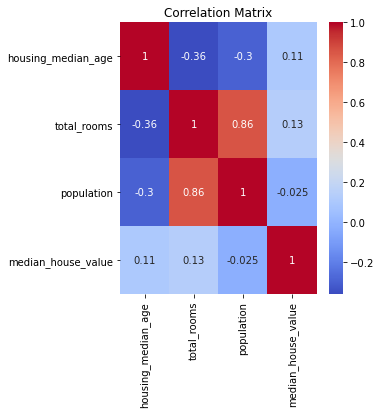

In [26]:
plt.figure(figsize=(15, 5))
    
# Correlation heatmap
plt.subplot(131)
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

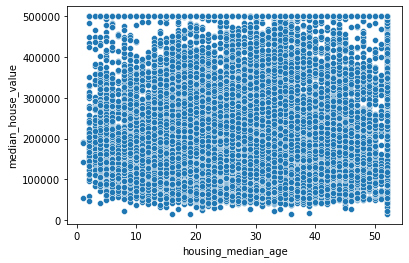

In [36]:
    
# housing_median_age vs median_house_value
# housing_median_age    0
# total_rooms           0
# population            0
# median_house_value    0

plt.subplot()
sns.scatterplot(x='housing_median_age', y='median_house_value', data=data)

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

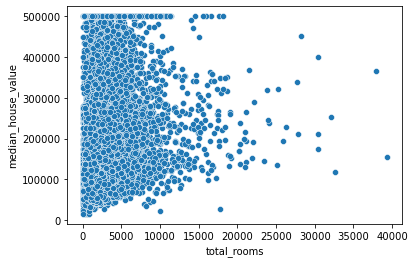

In [37]:
plt.subplot()
sns.scatterplot(x='total_rooms', y='median_house_value', data=data)

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

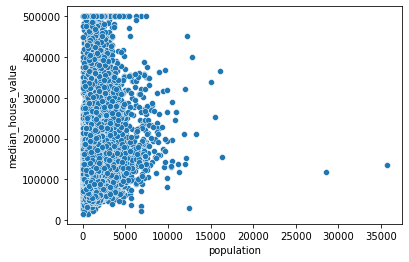

In [38]:
plt.subplot()
sns.scatterplot(x='population', y='median_house_value', data=data)


# phần lớn dân cư tập trung nhiều: 0-5000
giá nhà 

In [40]:
"""Xây dựng mô hình dự đoán lương"""
    # Prepare features and target
X = data[['housing_median_age', 'total_rooms', 'population']]
y = data['median_house_value']

In [41]:
 # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predictions
y_pred = model.predict(X_test)
    
print("\nModel Performance:")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    
# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': abs(model.coef_)
}).sort_values('Coefficient', ascending=False)
    
print("\nFeature Importance:")
print(importance)

##
    


Model Performance:
R2 Score: 0.1151
RMSE: 109030.6650

Feature Importance:
              Feature  Coefficient
0  housing_median_age  1682.030000
2          population    54.260241
1         total_rooms    35.131706
